In [71]:
import pandas as pd
from sklearn.metrics import silhouette_score
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.sparse import lil_matrix
from sklearn.decomposition import TruncatedSVD 

In [72]:
cars = pd.read_csv("/Users/johnspurrier/Downloads/car_data.csv")

In [73]:
cars = cars.set_index(['make','model','year'])

In [74]:
cars = cars.drop(columns=['class','drive','fuel_type','transmission'])


In [75]:
cars['price'] = cars['price'].astype(int)
cars['price'] = cars['price']/1000

In [76]:
cars = cars.dropna()


In [105]:
from sklearn.cluster import KMeans


# Elbow City Price

In [112]:
interia_scores = []
for test_k in range(2, 15, 1):
    print(test_k)
    
    tmp_model = KMeans(n_clusters=test_k)
    tmp_model.fit(cars[['price','city_mpg']])
    
    score = tmp_model.inertia_
    interia_scores.append((test_k, score))


2
3
4
5
6
7
8
9
10
11
12
13
14


In [113]:
intertia_df = pd.DataFrame(interia_scores, columns=["k", "score"])
intertia_df

,k,score
0,2,30181.442402
1,3,20112.554637
2,4,16432.065615
3,5,13375.118547
4,6,11375.544698
5,7,9778.254108
6,8,8352.095598
7,9,7286.455635
8,10,6447.687437
9,11,5713.280927


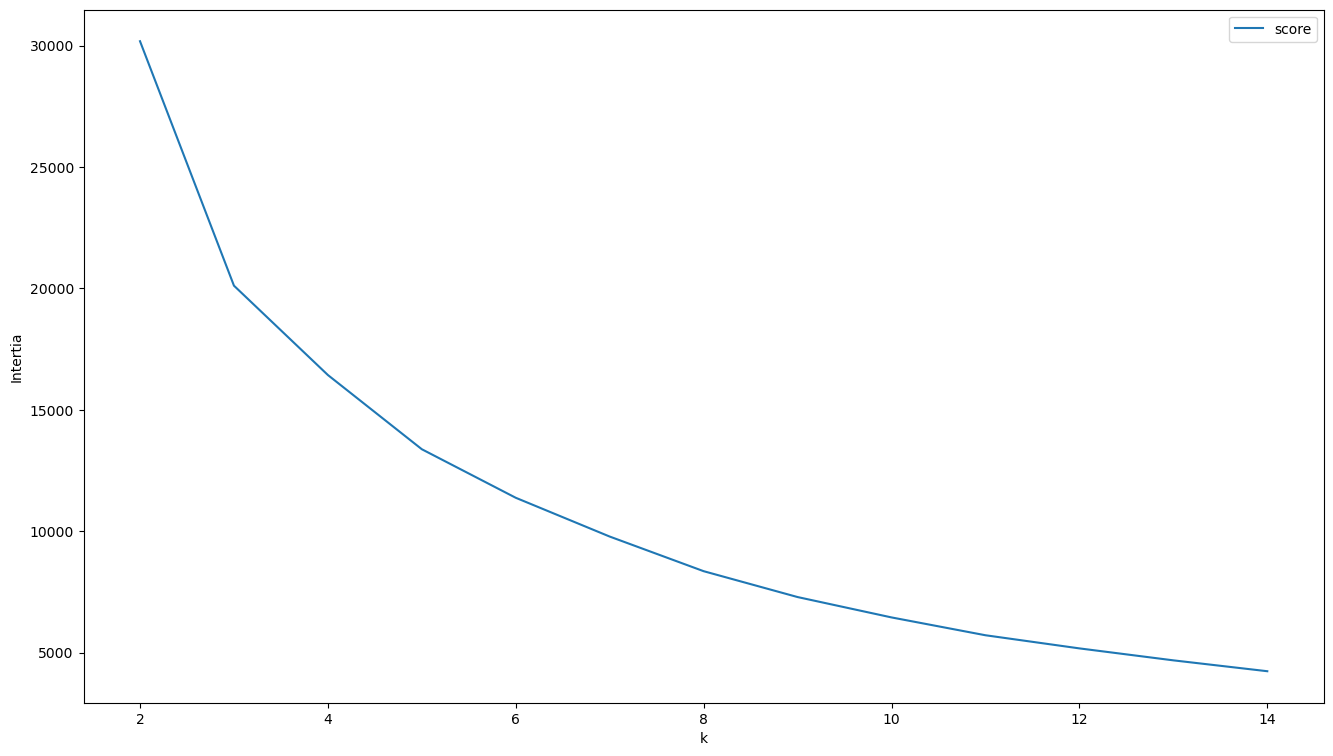

In [114]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(1,1,1)

intertia_df.plot("k", "score", ax=ax)

ax.set_ylabel("Intertia")

plt.show()


# City Price Cluster

In [115]:
k = 5
model = KMeans(n_clusters=k)
model.fit(cars[['price', 'city_mpg']])
cars["cluster"] = model.labels_

Text(0, 0.5, 'City mpg')

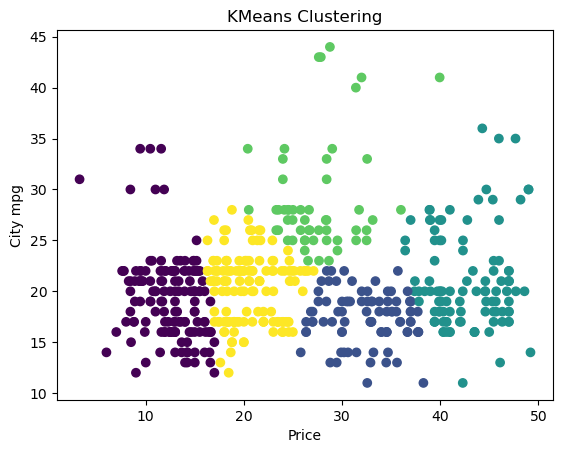

In [116]:
plt.scatter(cars['price'], cars['city_mpg'], c=cars["cluster"])
plt.title("KMeans Clustering")
plt.xlabel("Price")
plt.ylabel("City mpg")

In [118]:
cars

city_mpg  combination_mpg  cylinders  \
make  model            year                                         
honda cr-v 2wd         2010        21               24        4.0   
      cr-v 4wd         2010        21               23        4.0   
      cr-v 2wd         2011        21               24        4.0   
      cr-v 4wd         2011        21               23        4.0   
      cr-v 2wd         2012        23               26        4.0   
...                               ...              ...        ...   
ford  explorer awd     2020        20               23        4.0   
                       2020        18               20        6.0   
      explorer ffv awd 2020        16               19        6.0   
      explorer hev rwd 2020        27               28        6.0   
      explorer hev awd 2020        23               25        6.0   

                             displacement  highway_mpg   price  cluster  
make  model            year                                              
honda cr-v 2wd         2010           2.4           28   8.260        0  
      cr-v 4wd         2010           2.4           27   8.460        0  
      cr-v 2wd         2011           2.4           28   9.330        0  
      cr-v 4wd         2011           2.4           27   9.580        0  
      cr-v 2wd         2012           2.4           30  13.532        0  
...                                   ...          ...     ...      ...  
ford  explorer awd     2020           2.3           27  44.599        2  
                       2020           3.0           24  44.599        2  
      explorer ffv awd 2020           3.3           23  44.994        2  
      explorer hev rwd 2020           3.3           29  45.995        2  
      explorer hev awd 2020           3.3           26  45.995        2  

[528 rows x 7 columns]

# Elbow Highway Price

In [119]:
interia_scores2 = []
for test_k in range(2, 15, 1):
    print(test_k)
    
    tmp_model2 = KMeans(n_clusters=test_k)
    tmp_model2.fit(cars[['price','highway_mpg']])
    
    score2 = tmp_model.inertia_
    interia_scores2.append((test_k, score))

2
3
4
5
6
7
8
9
10
11
12
13
14


In [120]:
intertia_df2 = pd.DataFrame(interia_scores, columns=["k", "score"])
intertia_df2

,k,score
0,2,30181.442402
1,3,20112.554637
2,4,16432.065615
3,5,13375.118547
4,6,11375.544698
5,7,9778.254108
6,8,8352.095598
7,9,7286.455635
8,10,6447.687437
9,11,5713.280927


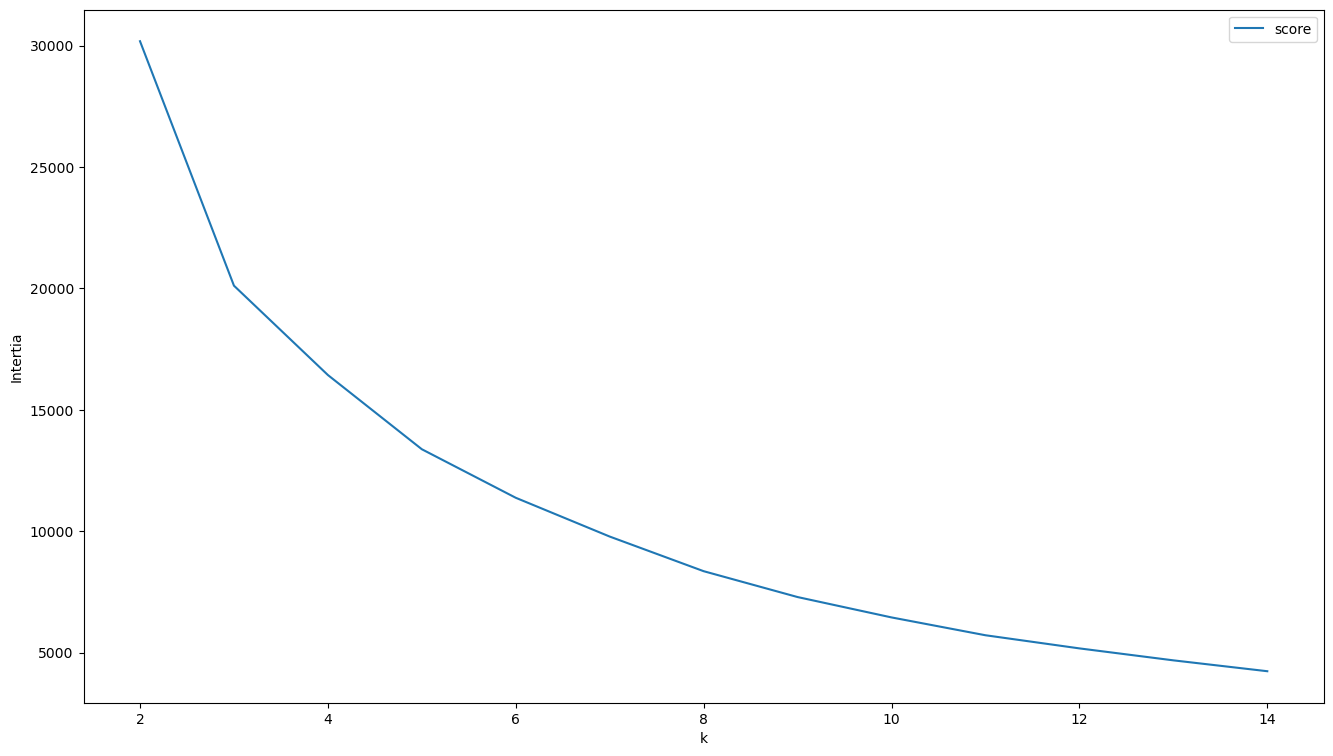

In [121]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(1,1,1)

intertia_df2.plot("k", "score", ax=ax)

ax.set_ylabel("Intertia")

plt.show()


# Highway Price Clusters

In [124]:
k = 3
model2 = KMeans(n_clusters=k)
model2.fit(cars[['price', 'highway_mpg']])
cars["cluster_2"] = model.labels_

Text(0, 0.5, 'Highway mpg')

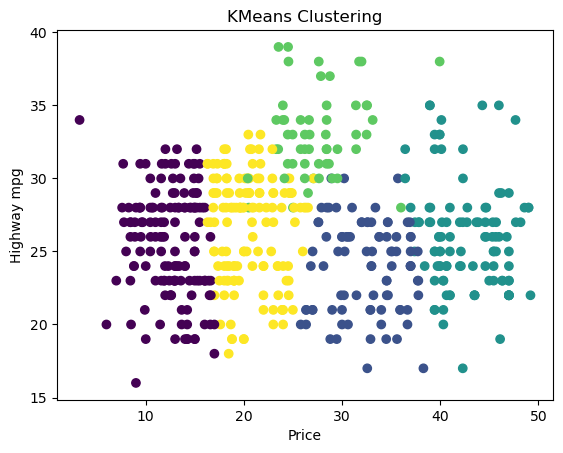

In [125]:
plt.scatter(cars['price'], cars['highway_mpg'], c=cars["cluster_2"])
plt.title("KMeans Clustering")
plt.xlabel("Price")
plt.ylabel("Highway mpg")